**Data Description:**
    The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

**Domain:**
    Object recognition 

**Context:**
    The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

**Objective:**
    Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

**Steps and tasks:** 
    1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)
    
    2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)
    
    3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)
    
    4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)
    
    5. Perform K-fold cross validation and get the cross validation score of the model (optional)
    
    6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)
    
    7.  Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)
    
    8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

**Import the necessary Libraries**

In [146]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import svm

from sklearn.decomposition import PCA
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

#    1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks) 

#    2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

In [147]:
# Read the dataset
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [148]:
#Print last 5 rows of parkinson data set
vehicle_df.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

**It is always a good practice to eye-ball raw data to get a feel of the data**

In [149]:
print(f" Shape of the Vehiles data set: {vehicle_df.shape}\n")
total_rows=vehicle_df.shape[0]
total_cols=vehicle_df.shape[1]
print(f" Total no of rows in the dataset: {total_rows}")
print(f" Total no of the column in the dataset: {total_cols}")

 Shape of the Vehiles data set: (846, 19)

 Total no of rows in the dataset: 846
 Total no of the column in the dataset: 19


**Observation:** Total 846 rows with 19 column in the data set

In [150]:
print("\nTotal Attributes in Vehicles Data Frame are: {}".format(len(vehicle_df.columns)))
print("\nTotal Attributes in Vehicles Data Frame and data type: \n\n {}".format(vehicle_df.dtypes))


Total Attributes in Vehicles Data Frame are: 19

Total Attributes in Vehicles Data Frame and data type: 

 compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object


**Checking the presence of missing values**

In [151]:
print(vehicle_df.isnull().values.any())

True


In [152]:
print('Total number of missing values:',vehicle_df.isnull().sum().sum())

Total number of missing values: 41


In [153]:
#missing data by percentage for each attributes
total = vehicle_df.isnull().sum().sort_values(ascending=False)
percent = (vehicle_df.isnull().sum()/vehicle_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                             Total   Percent
radius_ratio                     6  0.007092
skewness_about                   6  0.007092
circularity                      5  0.005910
scaled_radius_of_gyration.1      4  0.004728
distance_circularity             4  0.004728
scaled_variance                  3  0.003546
pr.axis_rectangularity           3  0.003546
scaled_radius_of_gyration        2  0.002364
scaled_variance.1                2  0.002364
pr.axis_aspect_ratio             2  0.002364
skewness_about.2                 1  0.001182
skewness_about.1                 1  0.001182
elongatedness                    1  0.001182
scatter_ratio                    1  0.001182
class                            0  0.000000
max.length_rectangularity        0  0.000000
max.length_aspect_ratio          0  0.000000
hollows_ratio                    0  0.000000
compactness                      0  0.000000


In [154]:
# Get the unique values of 'class' column 
vehicle_df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

**Observation:**

The dataset have null/missing values. Total number of missing values: 41.

Except 'class, max.length_rectangularity, max.length_aspect_ratio, hollows_ratio, compactness' all other columns have null/missing values. Though the percentage of the missing values is very less and is even less than 1%.

'class' column have object value with 'van', 'car', 'bus' type 

Among this all the attributes 'class' is a target attribute for our analysis

Except 'class' all other columns are continuous or kinda continuous variables

In [155]:
vehicle_df['class'].count()

846

**Treating the Null Values**
As the number of null values al on the numrical values and not on the class attributes, also as the **null values is approximately 5% (41/846) of thotal values**, instead of dropping this values, we can use **apply mean values of the data to all this variables** and we do not loose the data.

In [156]:
vehicle_df.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
dtype: float64

**This code impute mean to the int columns and mode to the object columns making a list of both types of columns and imputing the missing value according to the conditions.**

In [157]:
cateogry_columns=vehicle_df.select_dtypes(include=['object']).columns.tolist()
integer_columns=vehicle_df.select_dtypes(include=['int64','float64']).columns.tolist()
print(cateogry_columns)
print(integer_columns)
for column in vehicle_df:
    if vehicle_df[column].isnull().any():
        if(column in cateogry_columns):
#            vehicle_df[column]=vehicle_df[column].fillna(vehicle_df[column].mode()[0], downcast=None)
            vehicle_df[column]=vehicle_df[column].replace(np.nan,vehicle_df[column].mode())
        else:
#            vehicle_df[column]=vehicle_df[column].fillna(vehicle_df[column].mean, downcast=None)
            vehicle_df[column]=vehicle_df[column].replace(np.nan,vehicle_df[column].mean())

['class']
['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']


In [158]:
print(vehicle_df.isnull().values.any())

False


In [159]:
#missing data by percentage for each attributes
total = vehicle_df.isnull().sum().sort_values(ascending=False)
percent = (vehicle_df.isnull().sum()/vehicle_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                             Total  Percent
class                            0      0.0
pr.axis_rectangularity           0      0.0
circularity                      0      0.0
distance_circularity             0      0.0
radius_ratio                     0      0.0
pr.axis_aspect_ratio             0      0.0
max.length_aspect_ratio          0      0.0
scatter_ratio                    0      0.0
elongatedness                    0      0.0
max.length_rectangularity        0      0.0
hollows_ratio                    0      0.0
scaled_variance                  0      0.0
scaled_variance.1                0      0.0
scaled_radius_of_gyration        0      0.0
scaled_radius_of_gyration.1      0      0.0
skewness_about                   0      0.0
skewness_about.1                 0      0.0
skewness_about.2                 0      0.0
compactness                      0      0.0


In [160]:
print('Total number of missing values after fillna:',vehicle_df.isnull().sum().sum())

Total number of missing values after fillna: 0


In [161]:
# Let us look at the target column which is 'status' to understand how the data is distributed amongst the various values
vehicle_df.groupby(["class"]).size()

class
bus    218
car    429
van    199
dtype: int64

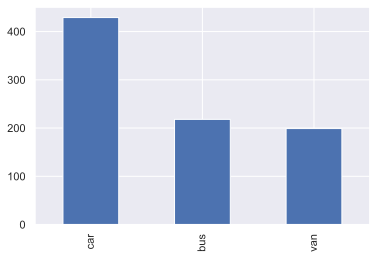

In [162]:
pd.value_counts(vehicle_df['class']).plot(kind='bar')

**Observation** Grouping the data based on class, we have more data in car class than other two types (bus, van). This may lead to biased output towards car class.

**Find relationship between different attributes (Independent variables)**

In [163]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [164]:
#Also Rearranging columns, to have the column "class" at the end considering it will be target variable.
arr_cols = [col for col in vehicle_df if col != 'class'] + ['class']
vehicle_df = vehicle_df[arr_cols]
vehicle_df.head(3)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car

**Let's visualize the distribution of the data**

In [165]:
#Measuring the skewneww of the data to understand its distribution
vehicle_df.skew(numeric_only  = True)

compactness                    0.381271
circularity                    0.262584
distance_circularity           0.106837
radius_ratio                   0.396381
pr.axis_aspect_ratio           3.834882
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607629
elongatedness                  0.047875
pr.axis_rectangularity         0.772254
max.length_rectangularity      0.256359
scaled_variance                0.652753
scaled_variance.1              0.843027
scaled_radius_of_gyration      0.279647
scaled_radius_of_gyration.1    2.088422
skewness_about                 0.779277
skewness_about.1               0.688423
skewness_about.2               0.249468
hollows_ratio                 -0.226341
dtype: float64

In [166]:
plt.figure(figsize= (12,16))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in vehicle_df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(8, 3, pos)   # plot grid
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
#    sns.set(font_scale=1)  
    if feature!='class':   # Plot histogram for all the columns except 'Class'
        d=sns.distplot(vehicle_df[feature], kde= True, rug=True)
#        d.axes.set_title(feature,fontsize=12)
#        d.set_xlabel(feature,fontsize=10)
#        d.set_ylabel("Frequency",fontsize=10)
    else:
        sns.countplot(x='class', data=vehicle_df);# Plot count graph for the column name
    pos += 1  # to plot over the grid one by one

**Observation about the data**

**Presence of Outliers(Will Validate Soon Using box Plot):** 
    1. 'scaled_radius_of_gyration.1'
    2. 'scaled_variance'
    3. 'scaled_variance.1'
    4. 'pr.axis_rectangularity'
    5. 'radius_ratio'
    6. 'pr.axis_aspect_ratio'
    7. 'max.length_aspect_ratio'

**Right Skewed Distribution :** 
    1. 'skewness_about'
    2. 'skewness_about.1'
    3. 'scaled_variance.1'
    4. 'scaled_variance'
    5. 'pr.axis_rectangularity'
    6. 'scatter_ratio'
    7. 'max.length_aspect_ratio'
    8. 'pr.axis_aspect_ratio','compactness'
**Left Skewed Distribution:**
    1. 'hollows_ratio'
**Normal Distribution:**
    1. 'distance_circularity'
    2. 'elongatedness'
    3. 'skewness_about.2'
    4. 'scaled_radius_of_gyration'
    5. 'max.length_rectangularity'
    6. 'radius_ratio'
    7. 'circularity'


**Checking the presence of outliers**

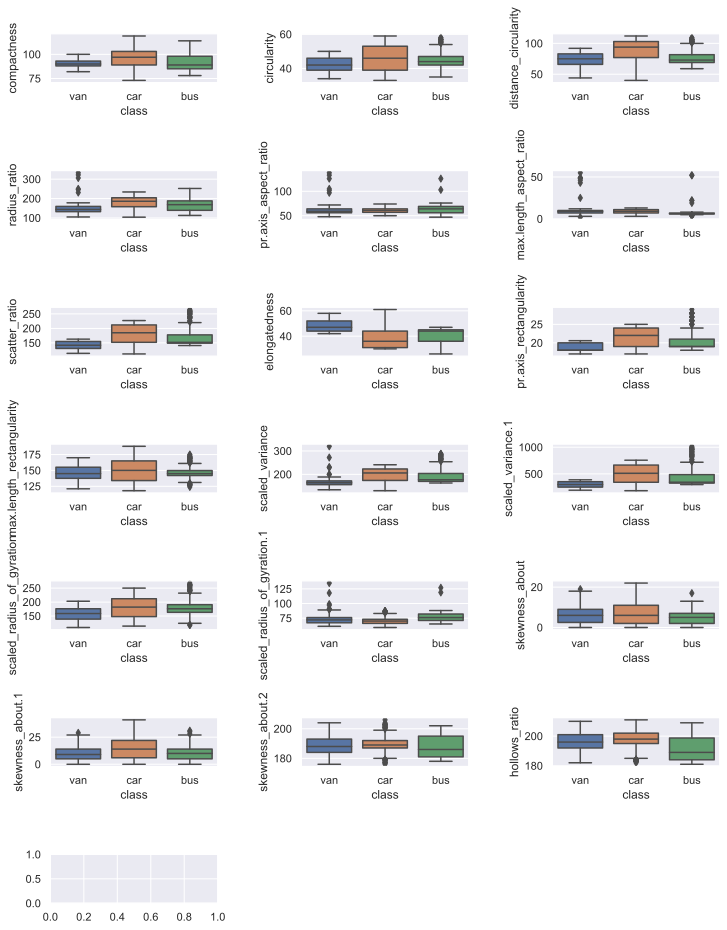

In [167]:
#Draw Box plot to visualze the outliers
plt.figure(figsize= (12,16))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in vehicle_df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(7, 3, pos)   # plot grid
    plt.subplots_adjust(hspace=1.8, wspace=.5)
    if feature not in ['class']:   # Plot histogram for all the columns except name
        sns.boxplot(x='class', y=feature, data=vehicle_df)
        sns.set(font_scale=1)       
    else:
        continue
    pos += 1  # to plot over the grid one by one 

**Our initial prediction about the outliers are now validated with the box plot and feature having the outliers are :

1. 'scaled_radius_of_gyration.1' (True)
2. 'scaled_variance' (True for Van & Bus)
3. 'scaled_variance.1'(True for Bus)
4. 'pr.axis_rectangularity'(True for Bus)
5. 'radius_ratio'(True for Van)
6. 'pr.axis_aspect_ratio'(True for Van and Bus)
7. 'max.length_aspect_ratio'(True for Van and Bus)

**One More Observation in details Car class has very less Outliers compared to bus and Van**

In [168]:
#for detecting outlier defined a function with data as input and then calculate the outlier values
def find_outliers(data):
    outlier_data=[]
    for i in data:
        if(i!='class'):
            outlier_data=[]
            stat=data[i].describe()
            min=stat.loc['min']
            Q1=stat.loc['25%']
            median=stat.loc['50%']
            Q3=stat.loc['75%']
            max=stat.loc['max']
            IQR=Q3-Q1
        #print(min,Q1,median,Q3,max,IQR)
            for j in data[i]:
            #print('Second iteration j val:',j)
            #print('Second iteration j:',j)
                if(j < (Q1 - 1.5 * IQR)):
                #print('out lier values',i,j,Q1,Q3,IQR)
                    outlier_data.append(j)
                if(j > (Q3 + 1.5 * IQR)):
                #print('out lier values',i,j,Q1,Q3,IQR)
                    outlier_data.append(j)
            print('Outliers data for',i,':',len(outlier_data))
            print(outlier_data)
            print('\n')
    return

In [169]:
find_outliers(vehicle_df)

Outliers data for compactness : 0
[]


Outliers data for circularity : 0
[]


Outliers data for distance_circularity : 0
[]


Outliers data for radius_ratio : 3
[306.0, 322.0, 333.0]


Outliers data for pr.axis_aspect_ratio : 8
[103.0, 126.0, 126.0, 133.0, 102.0, 138.0, 97.0, 105.0]


Outliers data for max.length_aspect_ratio : 13
[52, 49, 52, 22, 48, 43, 49, 25, 46, 19, 2, 55, 22]


Outliers data for scatter_ratio : 0
[]


Outliers data for elongatedness : 0
[]


Outliers data for pr.axis_rectangularity : 0
[]


Outliers data for max.length_rectangularity : 0
[]


Outliers data for scaled_variance : 1
[320.0]


Outliers data for scaled_variance.1 : 2
[998.0, 1018.0]


Outliers data for scaled_radius_of_gyration : 0
[]


Outliers data for scaled_radius_of_gyration.1 : 15
[127.0, 118.0, 88.0, 88.0, 119.0, 97.0, 89.0, 90.0, 88.0, 135.0, 88.0, 91.0, 90.0, 99.0, 88.0]


Outliers data for skewness_about : 12
[20.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 20.0, 21.0]


Outliers

**Correcting Outliers Data for Future Analysis**

In [170]:
def correct_outliers(data):
    out_data=data
    colx=0
    for i in data:
#        print(i)
        if(i!='class'):
            stat=data[i].describe()
            min=stat.loc['min']
            Q1=stat.loc['25%']
            Q2=stat.loc['50%']       
            Q3=stat.loc['75%']
            max=stat.loc['max']
            IQR=Q3-Q1  
            count=0
            roh=0        
            for j in data[i]:
                max_val=(Q3 + 1.5 * IQR)
                min_val=(Q1 - 1.5 * IQR)
#            print(data.iloc[colx,roh])
                count+=1
                if(j > max_val):
                #print('outlier',i,roh,colx,j,Q2)
                #Replace the outliers value(higher Side) with the median
                    out_data.iat[roh,colx]=Q2 
                elif(j < min_val):
                #print('outlier',i,roh,colx,j,Q2)
                #Replace the outliers value(lower Side) with the median                
                    out_data.iat[roh,colx]=Q2 
                roh+=1
            colx+=1
    return out_data
#correct_outliers(sub_df_ins)

In [171]:
#sub_vehicle_df=vehicle_df.drop(["class"], axis = 1)
vehicle_df=correct_outliers(vehicle_df)

In [172]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                  61.0                        8          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         72.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

**After Correction of Outliers Data with the median Value, Updated Graphs comming as below**

In [173]:
find_outliers(vehicle_df)

Outliers data for compactness : 0
[]


Outliers data for circularity : 0
[]


Outliers data for distance_circularity : 0
[]


Outliers data for radius_ratio : 0
[]


Outliers data for pr.axis_aspect_ratio : 0
[]


Outliers data for max.length_aspect_ratio : 0
[]


Outliers data for scatter_ratio : 0
[]


Outliers data for elongatedness : 0
[]


Outliers data for pr.axis_rectangularity : 0
[]


Outliers data for max.length_rectangularity : 0
[]


Outliers data for scaled_variance : 0
[]


Outliers data for scaled_variance.1 : 0
[]


Outliers data for scaled_radius_of_gyration : 0
[]


Outliers data for scaled_radius_of_gyration.1 : 0
[]


Outliers data for skewness_about : 0
[]


Outliers data for skewness_about.1 : 0
[]


Outliers data for skewness_about.2 : 0
[]


Outliers data for hollows_ratio : 0
[]




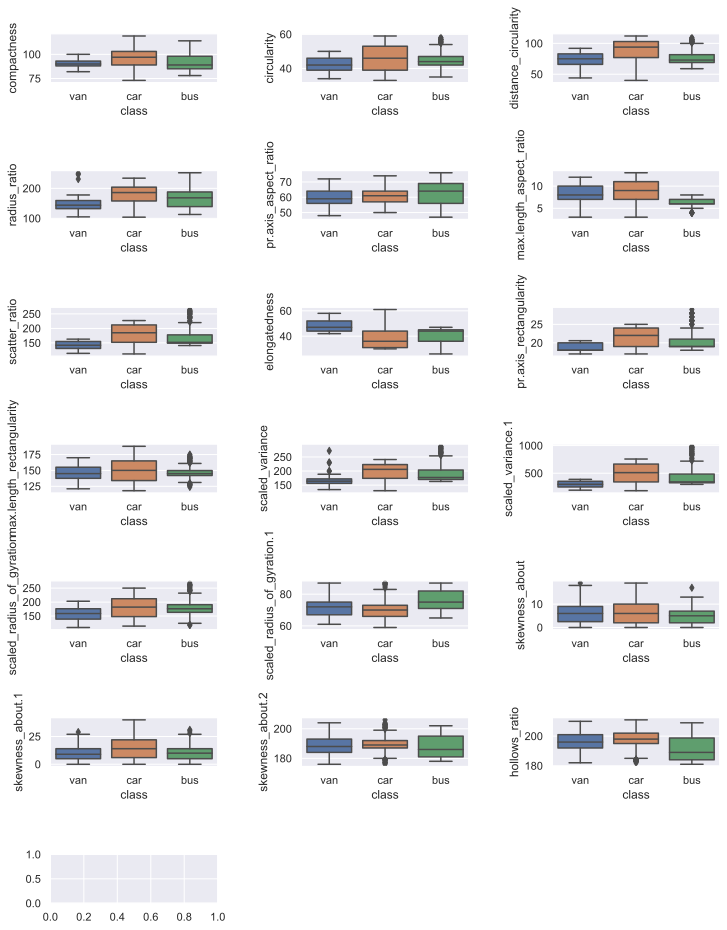

In [174]:
#Draw Box plot to visualze the outliers
plt.figure(figsize= (12,16))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in vehicle_df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(7, 3, pos)   # plot grid
    plt.subplots_adjust(hspace=1.8, wspace=.5)
    if feature not in ['class']:   # Plot histogram for all the columns except name
        sns.boxplot(x='class', y=feature, data=vehicle_df)
        sns.set(font_scale=1)       
    else:
        continue
    pos += 1  # to plot over the grid one by one

In [175]:
vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.347906   32.147650  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.156451    5.613510   47.0   57.00   
max.length_aspect_ratio      846.0    8.118203    2.064114    3.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.464413   31.029128  130.0  167.00   
scaled_variance.1            846.0  437.971617  174.308021  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   71.957200    6.158580   59.0   67.00   
skewness_about               846.0    6.150338    4.572969    0.0    2.00   
skewness_about.1             846.0   12.566906    8.877301    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 168.0  194.75  252.0  
pr.axis_aspect_ratio          61.0   65.00   76.0  
max.length_aspect_ratio        8.0   10.00   13.0  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   29.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              179.0  216.75  288.0  
scaled_variance.1            364.0  586.00  987.0  
scaled_radius_of_gyration    174.0  198.00  268.0  
scaled_radius_of_gyration.1   72.0   75.00   87.0  
skewness_about                 6.0    9.00   19.0  
skewness_about.1              11.0   19.00   40.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0

# ZScore Scaling

**Before going for Pairplot to do the data analysis or for future PCA Analysis where the scaling is Very important, and looking into the data with variable means, lets scale the data using the zScore**

In [176]:
#Apply Label Encoding to treat object/categorical variable
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
vehicle_df['class']= label_encoder.fit_transform(vehicle_df['class']) 
vehicle_df['class'].unique() 

array([2, 1, 0], dtype=int64)

In [177]:
#apply zscore
sns.set_style(style='darkgrid')  # Setting the plot style. Purely for aesthetic purposes
%config InlineBackend.figure_format = 'svg'
from scipy.stats import zscore
vehicle_df_z=vehicle_df.apply(zscore)
vehicle_df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.300420   
1    -0.325470    -0.624564              0.120112     -0.851200   
2     1.254193     0.843549              1.518571      1.265291   
3    -0.082445    -0.624564             -0.007021     -0.290952   
4    -1.054545    -0.135193             -0.769817      1.140792   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.932830                 0.912212      -0.208038   
1             -0.740875                 0.427456      -0.599893   
2              0.863348                 0.912212       1.148382   
3              0.328607                 0.427456      -0.750606   
4             -0.027887                -0.057300      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401938          -0.338519                   0.285618   
1        -0.595419          -0.619796                  -0.513719   
2         1.113664           1.131015                   1.392391   
3        -0.917888          -0.740344                  -1.466773   
4         1.694107          -0.648498                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.317988       -0.032895          0.386956   
1                     0.006954        0.623522          0.161529   
2                     0.169425        1.717551         -0.402038   
3                    -1.455286       -0.032895         -0.289325   
4                     0.006954        0.623522         -0.176611   

   skewness_about.2  hollows_ratio     class  
0         -0.312193       0.183957  1.457086  
1          0.013088       0.452977  1.457086  
2         -0.149552       0.049447  0.032005  
3          1.639494       1.529056  1.457086  
4         -1.450677      -1.699181 -1.393075

In [179]:
#Pair Plot Diagram of scaled data
sns.pairplot(vehicle_df_z, diag_kind='kde',hue='class')
# Title 
plt.suptitle('Pair Plot of Vehicles Data',size = 28);
plt.savefig("vehicles_pair_plot.png")
plt.close()

In [180]:
#Generate the Co-relation Matrix
vehicle_df_z.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.721988     0.638393              0.794294   
pr.axis_aspect_ratio            0.193100     0.202738              0.244306   
max.length_aspect_ratio         0.499928     0.560067              0.666647   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.770575     0.803291              0.870051   
scaled_variance.1               0.808092     0.830089              0.885282   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.248242     0.069350             -0.230187   
skewness_about                  0.196883     0.136594              0.099014   
skewness_about.1                0.156722    -0.010078              0.262354   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   
class                          -0.033796    -0.159804             -0.064902   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721988              0.193100   
circularity                      0.638393              0.202738   
distance_circularity             0.794294              0.244306   
radius_ratio                     1.000000              0.650738   
pr.axis_aspect_ratio             0.650738              1.000000   
max.length_aspect_ratio          0.463999              0.150277   
scatter_ratio                    0.769693              0.194212   
elongatedness                   -0.825686             -0.298492   
pr.axis_rectangularity           0.743994              0.162831   
max.length_rectangularity        0.579807              0.147896   
scaled_variance                  0.786985              0.207884   
scaled_variance.1                0.762029              0.197112   
scaled_radius_of_gyration        0.550987              0.148793   
scaled_radius_of_gyration.1     -0.390628             -0.321697   
skewness_about                   0.035738             -0.056127   
skewness_about.1                 0.179702             -0.021289   
skewness_about.2                 0.405705              0.400841   
hollows_ratio                    0.491694              0.415725   
class                           -0.213875             -0.209490   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812235   
circularity                                 0.560067       0.848207   
distance_circularity                        0.666647       0.904400   
radius_ratio                                0.463999       0.769693   
pr.axis_aspect_ratio                        0.150277       0.194212   
max.length_aspect_ratio                     1.000000       0.490360   
scatter_ratio                               0.490360       1.000000   
elongatedness                              -0.504032      -0.970723   
pr.axis_rectangularity                      0.488316       0.989370   
max.length_rectangularity                   0.642713       0.808356   
scaled_variance                             0.401572       0.960513   
scaled_variance.1                           0.464533       0.981244   
scaled_radius_of_gyration                   0.397329       0.799266   
scaled_radius_of_gyration.1                -0.336639       0.010024   
skewness_about                            

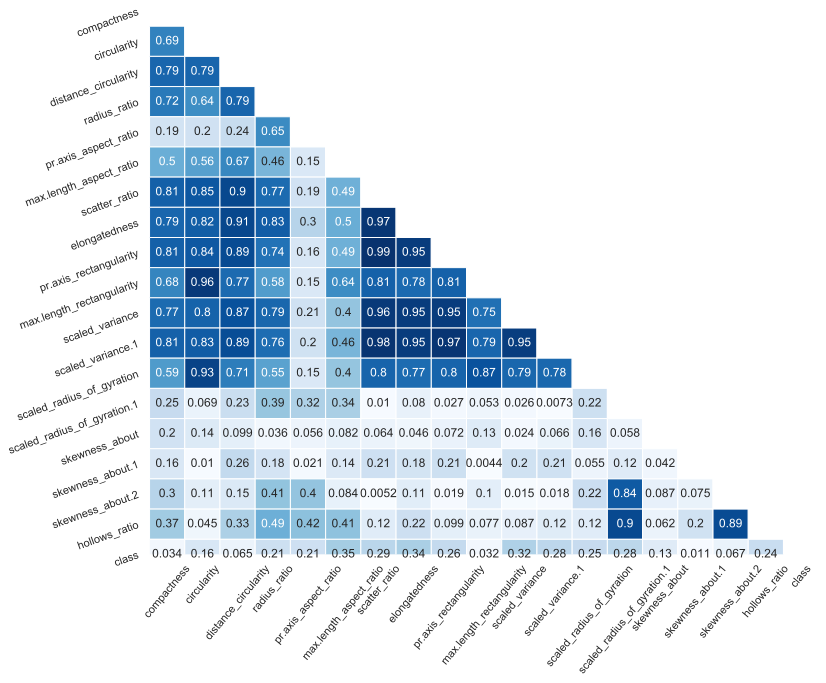

In [184]:
corr = abs(vehicle_df_z.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

**Observation: As the Number of Attributes is very high, lets calculate the Correlation among the attributes to come to a conclusion**

**High negative correlation among the attributes**

In [185]:
CorrMat = vehicle_df_z.corr()
indices = np.where(CorrMat <= -0.7)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
indices

[('compactness', 'elongatedness'),
 ('circularity', 'elongatedness'),
 ('distance_circularity', 'elongatedness'),
 ('radius_ratio', 'elongatedness'),
 ('scatter_ratio', 'elongatedness'),
 ('elongatedness', 'pr.axis_rectangularity'),
 ('elongatedness', 'max.length_rectangularity'),
 ('elongatedness', 'scaled_variance'),
 ('elongatedness', 'scaled_variance.1'),
 ('elongatedness', 'scaled_radius_of_gyration'),
 ('scaled_radius_of_gyration.1', 'skewness_about.2'),
 ('scaled_radius_of_gyration.1', 'hollows_ratio')]

**elongatedness- Has a very high negetive corellation with the attributes** - compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration

**scaled_radius_of_gyration.1- Has a very high negetive corellation with the attributes** -'skewness_about.2', 'hollows_ratio'

**High positive correlation among the attributes**

In [186]:
indices = np.where(CorrMat > 0.7)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
indices

[('compactness', 'distance_circularity'),
 ('compactness', 'radius_ratio'),
 ('compactness', 'scatter_ratio'),
 ('compactness', 'pr.axis_rectangularity'),
 ('compactness', 'scaled_variance'),
 ('compactness', 'scaled_variance.1'),
 ('circularity', 'distance_circularity'),
 ('circularity', 'scatter_ratio'),
 ('circularity', 'pr.axis_rectangularity'),
 ('circularity', 'max.length_rectangularity'),
 ('circularity', 'scaled_variance'),
 ('circularity', 'scaled_variance.1'),
 ('circularity', 'scaled_radius_of_gyration'),
 ('distance_circularity', 'radius_ratio'),
 ('distance_circularity', 'scatter_ratio'),
 ('distance_circularity', 'pr.axis_rectangularity'),
 ('distance_circularity', 'max.length_rectangularity'),
 ('distance_circularity', 'scaled_variance'),
 ('distance_circularity', 'scaled_variance.1'),
 ('distance_circularity', 'scaled_radius_of_gyration'),
 ('radius_ratio', 'scatter_ratio'),
 ('radius_ratio', 'pr.axis_rectangularity'),
 ('radius_ratio', 'scaled_variance'),
 ('radius_rat

**High Positive Correlation :**

**distance_circularity'with** - 'radius_ratio', 'scatter_ratio', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'compactness', 'circularity'

**circularity with**- 'distance_circularity', 'scatter_ratio', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration')

**compactness with**-'distance_circularity','radius_ratio', 'scatter_ratio', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1'

**radius_ratio with**-'scatter_ratio', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1'

**scatter_ratio with**-'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'

**pr.axis_rectangularity with**- 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'

**max.length_rectangularity with**-'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'

**scaled_variance with**-'scaled_variance.1', 'scaled_radius_of_gyration'

**scaled_variance.1 with**-'scaled_radius_of_gyration'

**skewness_about.2 with**-'hollows_ratio'

#    3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

# 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)

# 5. Perform K-fold cross validation and get the cross validation score of the model (optional)

In [187]:
#we have already converted the class attributes with the label encoder, check once before spliting the data into test train
vehicle_df.head(3)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1

In [188]:
# Now lets split the data to test and train
from sklearn import model_selection

X = vehicle_df.iloc[:,:-1]
y = vehicle_df['class']

test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (592, 18)
X_test:  (254, 18)
y_train:  (592,)
y_test:  (254,)


In [189]:
vehicle_df.groupby(["class"]).size()

class
0    218
1    429
2    199
dtype: int64

**As the class imbalance is there in the data, lets scale the train data for any prediction**

**SMOTE to upsample smaller class**

In [190]:
# calculate accuracy measures and confusion matrix
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(y_train==1)))
print("Before UpSampling, counts of label '2': {} \n".format(sum(y_train==2)))

sm = SMOTE(sampling_strategy = 'all' ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_up, y_train_up = sm.fit_sample(X_train, y_train.ravel())


print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_up==0)))
print("After UpSampling, counts of label '1': {} \n".format(sum(y_train_up==1)))
print("After UpSampling, counts of label '2': {} \n".format(sum(y_train_up==2)))




print('After UpSampling, the shape of train_X: {}'.format(X_train_up.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_up.shape))

Before UpSampling, counts of label '0': 147 

Before UpSampling, counts of label '1': 304 

Before UpSampling, counts of label '2': 141 

After UpSampling, counts of label '0': 304 

After UpSampling, counts of label '1': 304 

After UpSampling, counts of label '2': 304 

After UpSampling, the shape of train_X: (912, 18)
After UpSampling, the shape of train_y: (912,) 



In [191]:
#Scaling of the Data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Apply Standard Scaler on the trained Data
X_train_up_std =  sc.fit_transform(X_train_up)

In [192]:
from sklearn.svm import SVC  
svclassifier = SVC(C= .5,kernel = 'linear')      # try with linear kernel 
svclassifier.fit(X_train_up_std, y_train_up)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [193]:
y_pred = svclassifier.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [194]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[ 17  54   0]
 [ 11 114   0]
 [ 26  32   0]]
              precision    recall  f1-score   support

           0       0.31      0.24      0.27        71
           1       0.57      0.91      0.70       125
           2       0.00      0.00      0.00        58

    accuracy                           0.52       254
   macro avg       0.29      0.38      0.32       254
weighted avg       0.37      0.52      0.42       254



In [195]:
result_1_linerar_svm_upsampling='Class 2 has 0 f1score with upscaling linear fit and overall accuracy is 52%'

**Class 2 has 0 f1score with upscaling and 'linear' fit. overall accuracy is 52%**

In [196]:
#Before going for DownSampling lets change the kernel to rbf and check the accuracy for the same C
from sklearn.svm import SVC  
svclassifier = SVC(C= .5,kernel = 'rbf')      # try with linear kernel 
svclassifier.fit(X_train_up_std, y_train_up)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [197]:
y_pred = svclassifier.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [198]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[  0  71   0]
 [  0 125   0]
 [  0  58   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.49      1.00      0.66       125
           2       0.00      0.00      0.00        58

    accuracy                           0.49       254
   macro avg       0.16      0.33      0.22       254
weighted avg       0.24      0.49      0.32       254



In [199]:
result_2_rbf_svm_upsampling='Class 0 & 2 has 0 f1score with upscaling rbf fit and overall accuracy is 49%'

**Observation: Accuracy is poor 49% in 'rbf' fit than 'linear' fit with upscaling of data,f1 score is 0 for calss 0 and 2**

In [200]:
#Lets do Downsampling and check the accuracy

In [201]:
c0_indices = vehicle_df[vehicle_df['class'] == 0].index   
c0_len = len(vehicle_df[vehicle_df['class'] == 0])        
print(c0_len)

c1_indices = vehicle_df[vehicle_df['class'] == 1].index       
c1_len = len(vehicle_df[vehicle_df['class'] == 1])            
print(c1_len)

c2_indices = vehicle_df[vehicle_df['class'] == 2].index       
c2_len = len(vehicle_df[vehicle_df['class'] == 2])            
print(c2_len)

218
429
199


In [202]:
random_indices_1 = np.random.choice( c1_indices, c1_len - 200 , replace=False)    #Randomly pick up 200 less data from class 1

In [203]:
down_sample_indices = np.concatenate([c0_indices,random_indices_1,c2_indices])
vehicle_df.loc[down_sample_indices].shape

(646, 19)

In [204]:
df_down_sample = vehicle_df.loc[down_sample_indices]
vehicle_df.loc[down_sample_indices]['class'].unique()

array([0, 1, 2], dtype=int64)

In [205]:
#Select Ststus as a dependent variable
y = df_down_sample['class']

# lets drop status as a dependent variable and "name" attribute which is of object type for model building.
X = df_down_sample.drop(['class'], axis=1)

#Split the data in the ratio of 70:30
X_train_dn,X_test,y_train_dn,y_test = train_test_split(X, y ,test_size=0.30, random_state=10)

In [206]:
#Scaling of the Data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Apply Z Score on the trained Data 
X_train_dn_z=X_train_dn.apply(zscore)
#Apply Standard Scaler on the trained Data
X_train_dn_std =  sc.fit_transform(X_train_dn)

In [207]:
from sklearn.svm import SVC  
svclassifier = SVC(C= .5,kernel = 'linear')      # try with linear kernel 
svclassifier.fit(X_train_dn_std, y_train_dn)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [208]:
y_pred = svclassifier.predict(X_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [209]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[63  0  0]
 [81  0  0]
 [50  0  0]]
              precision    recall  f1-score   support

           0       0.32      1.00      0.49        63
           1       0.00      0.00      0.00        81
           2       0.00      0.00      0.00        50

    accuracy                           0.32       194
   macro avg       0.11      0.33      0.16       194
weighted avg       0.11      0.32      0.16       194



In [210]:
result_3_linear_svm_downsampling='Class 1 & 2 has 0 f1score with downsampling linear fit and overall accuracy is 32%'

In [211]:
#lets change the kernel and see the accuracy result
from sklearn.svm import SVC  
svclassifier = SVC(C= .5,kernel = 'rbf')      # try with linear kernel 
svclassifier.fit(X_train_dn_std, y_train_dn)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [212]:
y_pred = svclassifier.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [213]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[ 0 63  0]
 [ 0 81  0]
 [ 0 50  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.42      1.00      0.59        81
           2       0.00      0.00      0.00        50

    accuracy                           0.42       194
   macro avg       0.14      0.33      0.20       194
weighted avg       0.17      0.42      0.25       194



In [214]:
result_4_rbf_svm_downsampling='Class 0 & 2 has 0 f1score with downscaling rbf fit and overall accuracy is 42%'

In [215]:
print('Summary of the model performance using SVM with Upsampling and Down Sampling \n')
print('result_1_linerar_svm_upsampling:     ',result_1_linerar_svm_upsampling)
print('result_2_rbf_svm_upsampling:         ',result_2_rbf_svm_upsampling)
print('result_3_linear_svm_downsampling:    ',result_3_linear_svm_downsampling)
print('result_4_rbf_svm_downsampling:       ',result_4_rbf_svm_downsampling)

Summary of the model performance using SVM with Upsampling and Down Sampling 

result_1_linerar_svm_upsampling:      Class 2 has 0 f1score with upscaling linear fit and overall accuracy is 52%
result_2_rbf_svm_upsampling:          Class 0 & 2 has 0 f1score with upscaling rbf fit and overall accuracy is 49%
result_3_linear_svm_downsampling:     Class 1 & 2 has 0 f1score with downsampling linear fit and overall accuracy is 32%
result_4_rbf_svm_downsampling:        Class 0 & 2 has 0 f1score with downscaling rbf fit and overall accuracy is 42%


**Observation: As of Now with upsampling and downsampling and between linear fit and rbf fit, svm given the best result for 'Class 2 has 0 f1score with upscaling linear fit and overall accuracy is 52%'**

**Perform K-fold cross validation - Its not covered in our learning as of Now**

#    5. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

In [216]:
X = vehicle_df.iloc[:,:-1]
y = vehicle_df['class']

test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

#Scaling of the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Apply Standard Scaler on the trained Data
X_train_std =  sc.fit_transform(X_train)

cov_matrix = np.cov(X_train_std.T)

#print('Covariance Matrix \n%s', cov_matrix)

X_train:  (592, 18)
X_test:  (254, 18)
y_train:  (592,)
y_test:  (254,)


In [217]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
#print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)


 Eigen Values 
%s [9.83243352e+00 3.34803866e+00 1.11945477e+00 1.16331679e+00
 8.64157949e-01 6.64888584e-01 3.19927458e-01 2.27571497e-01
 1.19328220e-01 8.07147094e-02 7.18213866e-02 6.63079599e-02
 6.73697778e-03 4.14350180e-02 3.36686163e-02 2.84819895e-02
 2.00674952e-02 2.21052616e-02]


In [218]:
tot = sum(eig_vals)
var_explained = [(i / tot) for i in sorted(eig_vals, reverse=True)]

cum_var_exp = np.cumsum(var_explained)
print('Cumulative Variance Explained:', cum_var_exp)

Cumulative Variance Explained: [0.54532359 0.73101155 0.79553109 0.85761797 0.90554564 0.9424215
 0.96016523 0.97278673 0.97940488 0.98388146 0.98786479 0.99154235
 0.9938404  0.99570772 0.99728738 0.99851338 0.99962636 1.        ]


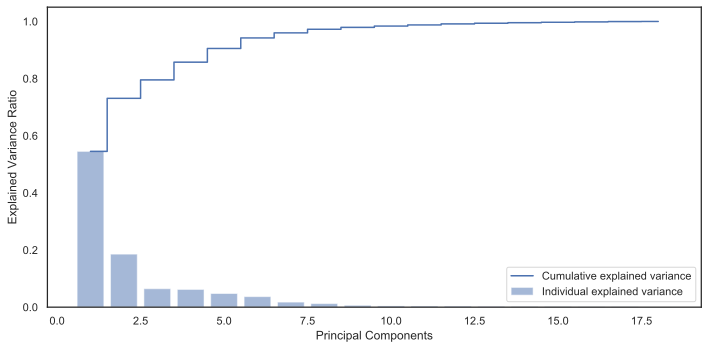

In [219]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

**on the above explained varience, let's reduce the dimention which will cover approximately 95% of varience, as required in problem solving statement.**

In [220]:
# Create a PCA that will retain 95% of the variance
pca = PCA(n_components=.95)
pca.fit(X_train_std)

# Conduct PCA
X_train_pca = pca.transform(X_train_std)

In [221]:
print('Original number of features:', X_train_std.shape[1])
print('Reduced number of features:', X_train_pca.shape[1])

Original number of features: 18
Reduced number of features: 7


In [222]:
# Lets tranform the X_test also, to make the same dimension
X_test_pca = pca.transform(X_test)

In [223]:
print('Original number of features:', X_test.shape[1])
print('Reduced number of features:', X_test_pca.shape[1])

Original number of features: 18
Reduced number of features: 7


In [224]:
pca_vehicle_data = pd.DataFrame(X_train_pca)  # converting to dataframe
pca_vehicle_data['y'] = y_train

In [225]:
pca_vehicle_data.head()

0         1         2         3         4         5         6    y
0  0.512113 -1.479586 -1.121913 -0.563198 -0.236374  0.215201 -0.689698  2.0
1  4.698358  0.230399  0.596291 -0.436300 -1.011494 -0.220137 -0.408325  NaN
2  0.223140  0.458794  0.018301 -0.123775 -1.869738 -1.336731 -0.485030  1.0
3  4.057841 -1.040571  2.443629 -0.020291  0.568288 -1.422094 -0.179741  2.0
4 -2.153362  0.888820 -0.118138 -1.118340 -0.352372  0.134063  0.275686  0.0

#    6. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)

In [226]:
pca_vehicle_data=pca_vehicle_data.replace(np.nan,pca_vehicle_data.mean())
pca_vehicle_data

0         1         2         3         4         5         6  \
0    0.512113 -1.479586 -1.121913 -0.563198 -0.236374  0.215201 -0.689698   
1    4.698358  0.230399  0.596291 -0.436300 -1.011494 -0.220137 -0.408325   
2    0.223140  0.458794  0.018301 -0.123775 -1.869738 -1.336731 -0.485030   
3    4.057841 -1.040571  2.443629 -0.020291  0.568288 -1.422094 -0.179741   
4   -2.153362  0.888820 -0.118138 -1.118340 -0.352372  0.134063  0.275686   
..        ...       ...       ...       ...       ...       ...       ...   
587 -0.365287  0.768631 -0.177833  0.791548 -0.061861 -0.196092 -0.719945   
588  4.794208  0.132262  0.436494 -1.640249 -0.625817 -0.124301  0.281673   
589  3.377469 -0.987529  0.459882  2.135534  0.042966  0.434288  0.501337   
590 -0.415013  0.697541 -1.905172  1.729995 -0.381754 -1.485441  0.449450   
591 -2.281414  2.308592  0.649434 -0.147501 -0.683005 -0.397423 -0.811228   

            y  
0    2.000000  
1    0.980535  
2    1.000000  
3    2.000000  
4    0.000000  
..        ...  
587  1.000000  
588  1.000000  
589  1.000000  
590  0.000000  
591  1.000000  

[592 rows x 8 columns]

**Step 3: Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)**

In [227]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_vehicle_data, y_train, test_size=0.30, random_state=10)

print('X_train_pca: ',X_train_pca.shape)
print('X_test_pca: ',X_test_pca.shape)
print('y_train_pca: ',y_train_pca.shape)
print('y_test_pca: ',y_test_pca.shape)

X_train_pca:  (414, 8)
X_test_pca:  (178, 8)
y_train_pca:  (414,)
y_test_pca:  (178,)


**Step 4: Train a Support vector machine using the train set and get the accuracy on the test set**

In [228]:
from sklearn.svm import SVC  
svclassifier = SVC(C= .5,kernel = 'linear')      # try with linear kernel 
svclassifier.fit(X_train_pca, y_train_pca)

y_pred_pca = svclassifier.predict(X_test_pca) 
y_pred_pca

array([1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0,
       0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1,
       1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       1, 1])

In [229]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test_pca,y_pred_pca))  
print(classification_report(y_test_pca,y_pred_pca))

[[35  7  1]
 [ 9 77  5]
 [ 5  6 33]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        43
           1       0.86      0.85      0.85        91
           2       0.85      0.75      0.80        44

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.81      0.82       178



In [230]:
result_5_linerar_svm_pca='overall accuracy is 81% and All class f1 score is 80%'
print('result_5_linerar_svm_PCA: ',result_5_linerar_svm_pca)

result_5_linerar_svm_PCA:  overall accuracy is 81% and All class f1 score is 80%


In [231]:
from sklearn.svm import SVC  
svclassifier = SVC(C= .5,kernel = 'rbf')      # try with rbf kernel 
svclassifier.fit(X_train_pca, y_train_pca)

y_pred_pca = svclassifier.predict(X_test_pca) 
y_pred_pca

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test_pca,y_pred_pca))  
print(classification_report(y_test_pca,y_pred_pca))

[[40  2  1]
 [ 1 86  4]
 [ 3  5 36]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.92      0.95      0.93        91
           2       0.88      0.82      0.85        44

    accuracy                           0.91       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.91      0.91      0.91       178



In [232]:
result_6_rbf_svm_pca='overall accuracy is 91% and All class f1 score is between 90%'
print('result_6_rbf_svm_pca: ',result_6_rbf_svm_pca)

result_6_rbf_svm_pca:  overall accuracy is 91% and All class f1 score is between 90%


**Observation: With PCA reduced reduced dimension to 7, We get better result in svm with rbf fit and chossing c value=0.5, Lets measure the accuracy by altering C value and See if there is any further improvement or Not**

In [233]:
from sklearn.svm import SVC  
svclassifier = SVC(C= .8,kernel = 'rbf')      # try with rbf kernel and modifying C value to .8
svclassifier.fit(X_train_pca, y_train_pca)

y_pred_pca = svclassifier.predict(X_test_pca) 
y_pred_pca

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test_pca,y_pred_pca))  
print(classification_report(y_test_pca,y_pred_pca))

[[41  1  1]
 [ 1 86  4]
 [ 4  4 36]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.95      0.95      0.95        91
           2       0.88      0.82      0.85        44

    accuracy                           0.92       178
   macro avg       0.90      0.91      0.90       178
weighted avg       0.92      0.92      0.92       178



In [234]:
result_7_rbf_svm_pca='overall accuracy is 92% and All class f1 score is 90%'
print('result_7_rbf_svm_pca: ',result_7_rbf_svm_pca)

result_7_rbf_svm_pca:  overall accuracy is 92% and All class f1 score is 90%


In [235]:
from sklearn.svm import SVC  
svclassifier = SVC(C= .3,kernel = 'rbf')      # try with rbf kernel and reducing C value to .3
svclassifier.fit(X_train_pca, y_train_pca)

y_pred_pca = svclassifier.predict(X_test_pca) 
y_pred_pca

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test_pca,y_pred_pca))  
print(classification_report(y_test_pca,y_pred_pca))

[[40  2  1]
 [ 1 87  3]
 [ 3  8 33]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.90      0.96      0.93        91
           2       0.89      0.75      0.81        44

    accuracy                           0.90       178
   macro avg       0.90      0.88      0.89       178
weighted avg       0.90      0.90      0.90       178



In [236]:
result_8_rbf_svm_pca='overall accuracy is 90% and All class f1 score is between 89%'
print('result_8_rbf_svm_pca: ',result_8_rbf_svm_pca)

result_8_rbf_svm_pca:  overall accuracy is 90% and All class f1 score is between 89%


**Observation: With PCA reduced reduced dimension to 7, We get best result in svm with rbf fit and c value=0.8**

#    8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points) 

In [237]:
#Accuracy scores of Support vector machine before PCA
print('Summary of the model performance using SVM with Upsampling and Down Sampling \n')
print('result_1_linerar_svm_upsampling:     ',result_1_linerar_svm_upsampling)
print('result_2_rbf_svm_upsampling:         ',result_2_rbf_svm_upsampling)
print('result_3_linear_svm_downsampling:    ',result_3_linear_svm_downsampling)
print('result_4_rbf_svm_downsampling:       ',result_4_rbf_svm_downsampling)

Summary of the model performance using SVM with Upsampling and Down Sampling 

result_1_linerar_svm_upsampling:      Class 2 has 0 f1score with upscaling linear fit and overall accuracy is 52%
result_2_rbf_svm_upsampling:          Class 0 & 2 has 0 f1score with upscaling rbf fit and overall accuracy is 49%
result_3_linear_svm_downsampling:     Class 1 & 2 has 0 f1score with downsampling linear fit and overall accuracy is 32%
result_4_rbf_svm_downsampling:        Class 0 & 2 has 0 f1score with downscaling rbf fit and overall accuracy is 42%


In [238]:
#Accuracy scores of Support vector machine After PCA
print('Summary of the model performance using SVM After PCA \n')
print('result_5_linerar_svm_PCA: ',result_5_linerar_svm_pca)
print('result_6_rbf_svm_pca: ',result_6_rbf_svm_pca)
print('result_7_rbf_svm_pca: ',result_7_rbf_svm_pca)
print('result_8_rbf_svm_pca: ',result_8_rbf_svm_pca)

Summary of the model performance using SVM After PCA 

result_5_linerar_svm_PCA:  overall accuracy is 81% and All class f1 score is 80%
result_6_rbf_svm_pca:  overall accuracy is 91% and All class f1 score is between 90%
result_7_rbf_svm_pca:  overall accuracy is 92% and All class f1 score is 90%
result_8_rbf_svm_pca:  overall accuracy is 90% and All class f1 score is between 89%


**Overall Observation**
    1. With PCA, reduced dimension, svm shows a better result compared to without PCA.
    2. Compared to Linear fit of SVM RBF fit performed better with more higher Accuracy and overal F1 Score for all class.
    3. Even We get better result at SVM increasing the C value to .8 from initial .5 whereas it was not showing improvement Reducing the C value from .5 to .3 with PCA and RBF Model.

**Final Result: With PCA reduced reduced dimension to 7 from original 18, We get best result in svm with rbf fit and c value=0.8**